# M15 globular cluster surface density and los velocity

Figure 10.2 from Chapter 10 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plot of the surface density of M15 including a King model with $W_0 = 8.2$ and $r_t = 13.1\,\mathrm{arcmin}$ (40\,pc) using data from de Boer et al. [2019, MNRAS, 485, 4906](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.4906D) with the profile data from his [GitHub repository](https://github.com/tdboer/GC_profiles), folder `stitched_profiles/`

The observed line-of-sight velocity dispersion for M15 uses data from 
Baumgardt [2017, MNRAS, 464, 2174](https://ui.adsabs.harvard.edu/abs/2017MNRAS.464.2174B) and 
Baumgardt & Hilker [2018, MNRAS, 478, 1520](https://ui.adsabs.harvard.edu/abs/2018MNRAS.478.1520B).

In [3]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [4]:
plotFile = 'Fig10_2.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Surface density and line-of-sight velocity dispersion

Data and pre-computed King models for M15

### Surface density data

File `M15_deBoer.txt` is surface density data from de Boer et al. 2019 derived from his
[GitHub repository](https://github.com/tdboer/GC_profiles), file `stitched_profiles/ngc7078_numdens_profile`.
The data are in 3-column ASCII format
 * `rad` - radius in arcminutes
 * `density` - surface density in sstars/arcmin$^2$
 * `density_err` - surface density error

Added a comment header to de Boer's original file to identify the data for this notebook.

### King Model

File `M15_KingModel.txt` is a pre-calculated King Model fit to the M15 surface density data using
parameters $W_0$=8.2 and $r_t$=13.08 arcminutes, central surface density of $\Sigma_0$=28000 stars/arcmin$^2$,
and background surface density of $\Sigma_{bkg}$=0.10 stars/arcmin$^2$.

Data are in 2-column ASCII format:
 * `log_r` - log$_{10}$r in arcminutes
 * `log_Sigma` - log$_{10}\Sigma$ in stars/arcmin$^2$
 
### Number-weighted line-of-sight velocity dispersion data

File `M15_losvd.txt` is number-weighted line-of-sight velocity dispersion data of M15 from Baumgardt, 2017, MNRAS, 464, 2174, and Baumgardt & Hilker, 2018, MNRAS, 478, 1520.  Data are in ASCII 4-column format:
 * `r` - radius in arcminutes
 * `losvd` - line-of-sight velocity dispersion ($\sigma$) in km/sec
 * `errP` - upper error on losvd in km/sec
 * `errM` - lower error on losvd in km/sec
 


In [5]:
# surface density data

dataFile = 'M15_deBoer.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

r = np.array(data['rad'])
Sigma = np.array(data['density'])
errSD = np.array(data['density_err'])

# King model fit

dataFile = 'M15_KingModel.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

r_king = 10.0**np.array(data['log_r'])
Sigma_king = 10.0**np.array(data['log_Sigma'])

# losvd data

dataFile = 'M15_losvd.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

r_los = np.array(data['r'])
losvd = np.array(data['losvd'])
err_sp = np.array(data['errP'])
err_sm = np.array(data['errM'])

errLOSVD = [err_sm,err_sp]

# plotting limits

rMin = 0.005 # arcmin
rMax = 100

sdMin = 0.03 # stars/arcmin^2
sdMax = 2.0e5

losvdMin = 0.0  # km/sec
losvdMax = 14.0


## Figure 10.2: side by side format

Left panel: $\Sigma$ vs $r$ as a log-log plot, data as filled circles with error bars, King model as a solid line

Right panel: $\sigma$ vs $r$ in a log-linear plot, data as filled circles with error bars


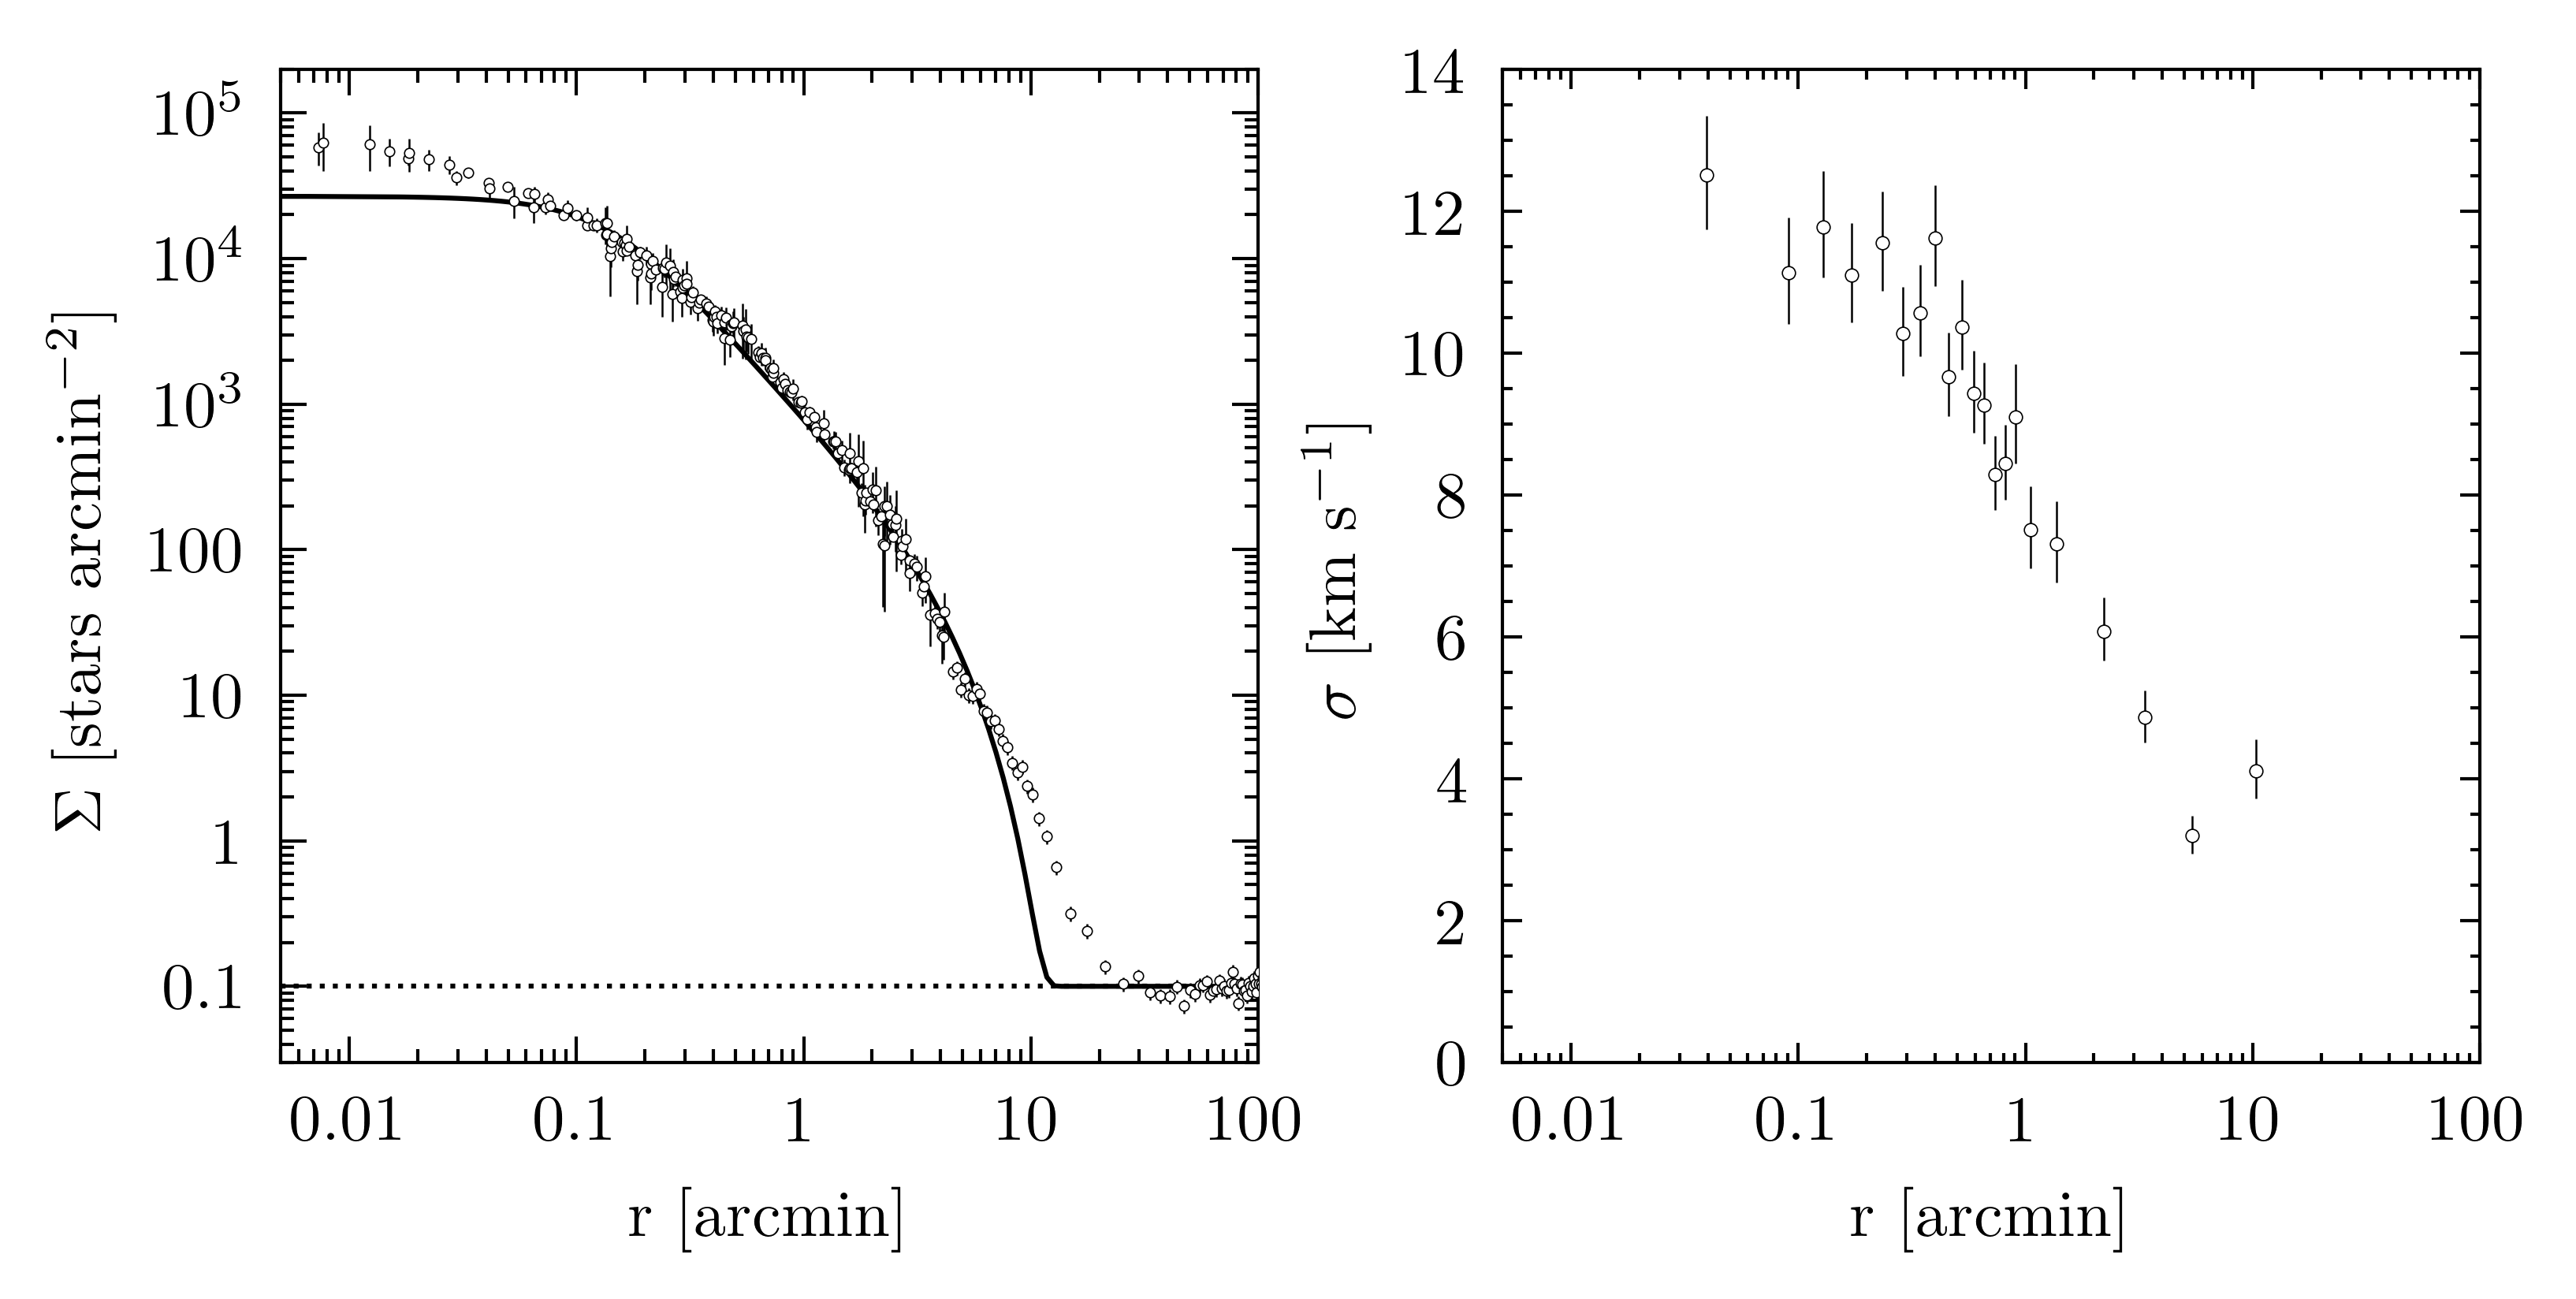

In [6]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# left panel: density profile and King model fit

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(rMin,rMax)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xticks([0.01,0.1,1,10,100])
ax1.set_xticklabels(['0.01','0.1','1','10','100'])
ax1.set_xlabel(r'r [arcmin]',fontsize=axisFontSize)

ax1.set_ylim(sdMin,sdMax)
ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([0.1,1,10,100,1e3,1e4,1e5])
ax1.set_yticklabels(['0.1','1','10','100','$10^3$','10$^4$','10$^5$'])
ax1.set_ylabel(r'$\Sigma$ [stars arcmin$^{-2}$]',fontsize=axisFontSize)

ax1.errorbar(r,Sigma,yerr=errSD,fmt='o',ms=1.5,mfc='white',mec='black',mew=0.2,ecolor='black',elinewidth=0.3,
             capsize=0.0,zorder=10)
ax1.plot(r_king,Sigma_king,'-',lw=0.75,color='black',zorder=9)

# background at Sigma=0.1

ax1.hlines(0.1,rMin,rMax,ls=[':'],colors=['black'],lw=0.75,zorder=8)

# right panel: losvd data

ax2.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(rMin,rMax)
ax2.set_xscale('log')
ax2.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xticks([0.01,0.1,1,10,100])
ax2.set_xticklabels(['0.01','0.1','1','10','100'])
ax2.set_xlabel(r'r [arcmin]',fontsize=axisFontSize)

ax2.set_ylim(losvdMin,losvdMax)
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.set_ylabel(r'$\sigma$ [km s$^{-1}$]',fontsize=axisFontSize)

ax2.errorbar(r_los,losvd,yerr=errLOSVD,fmt='o',ms=2,mfc='white',mec='black',mew=0.2,ecolor='black',elinewidth=0.3,
             capsize=0.0,zorder=10)
    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')